<a href="https://colab.research.google.com/github/theDeveloperShoon/MLFinalProjectPub/blob/main/final_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [27]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
#%cd drive/MyDrive/CS156

# Extract data and install packages (regardless of data acquisition method)

In [2]:
### TODO: Install required packages
### Student's code here
#!pip install pandas
#!pip install scikit-learn
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install textstat
#!pip install nltk
### END


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


   ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
   ---------------------------------------- 105.1/105.1 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------- -------------------------------- 0.4/2.1 MB 23.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 16.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 14.7 MB/s eta 0:00:00


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 9.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 9.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.5 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.0 kB ? eta -:--:--
   --------------------------------------- 269.0/269.0 kB 17.2 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\nltk.exe' -> 'C:\\Python310\\Scripts\\nltk.exe.deleteme'



In [2]:
#import nltk
#nltk.download('all')

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [3]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

In [4]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [5]:
summaries = pd.read_csv("summaries_train.csv",dtype=dtypes)
prompts = pd.read_csv("prompts_train.csv",dtype=dtypes)

#display(summaries.head())
#display(prompts)

#print(summaries.dtypes)
#print(prompts.dtypes)
#print(prompts['prompt_id'])

#d = summaries.join(prompts,on='prompt_id')
d = pd.merge(summaries,prompts,on='prompt_id',how='left')
#print(d.dtypes)

#display(d)
#print(summaries.info())
#print(prompts.info())
df = pd.DataFrame(data=d,columns=use_cols)
display(df.head())

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...


## **Section 2: Features (Q2 and Q3, 25 points total)**

In [6]:
display(df)

feat_cols = [
    "word_count_prompt",
    "word_count_response",
    "unique_words_prompt",
    "unique_words_response",
    "common_words_response_prompt",
    "common_words_response_prompt_question",
    "common_words_response_prompt_title"
]

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
...,...,...,...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.40818,-0.493603,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.39331,0.627128,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...


In [9]:
#print(df.index)

word_prompt = [df["prompt_text"][i].split(" ") for i in range(len(df["prompt_text"]))]
word_response = [df["text"][i].split(" ") for i in range(len(df["text"]))]
unique_words_p = [np.unique(word_prompt[i]) for i in range(len(df["prompt_text"]))]
unique_words_r = [np.unique(word_response[i]) for i in range(len((df["text"])))]
unique_words_q = [np.unique(df["prompt_question"][i].split(" ")) for i in range(len((df["prompt_question"])))]
unique_words_t = [np.unique(df["prompt_title"][i].split(" ")) for i in range(len((df["prompt_title"])))]

word_count_prompt = [len(word_prompt[i]) for i in range(len(word_prompt))]
word_count_response = [len(word_response[i]) for i in range(len(word_response))]
unique_words_prompt = [len(unique_words_p[i]) for i in range(len(unique_words_p))]
unique_words_response = [len(unique_words_r[i]) for i in range(len(unique_words_r))]

common_words_response_prompt = [len(np.intersect1d(unique_words_p[i],unique_words_r[i])) for i in range(len(unique_words_p))]
common_words_response_prompt_question = [len(np.intersect1d(unique_words_q[i],unique_words_r[i])) for i in range(len(unique_words_q))]
common_words_response_prompt_title = [len(np.intersect1d(unique_words_t[i],unique_words_r[i])) for i in range(len(unique_words_t))]

dic = {
    "word_count_prompt": word_count_prompt,
    "word_count_response": word_count_response,
    "unique_words_prompt": unique_words_prompt,
    "unique_words_response": unique_words_response,
    "common_words_response_prompt": common_words_response_prompt,
    "common_words_response_prompt_question": common_words_response_prompt_question,
    "common_words_response_prompt_title": common_words_response_prompt_title
}
df1 = pd.DataFrame(data=dic)
display(df1)

#for ind in df.index:
#  pass

,word_count_prompt,word_count_response,unique_words_prompt,unique_words_response,common_words_response_prompt,common_words_response_prompt_question,common_words_response_prompt_title
0,597,61,304,51,21,5,1
1,966,52,424,38,31,4,0
2,550,235,322,149,65,9,0
3,550,25,322,19,13,2,0
4,597,206,304,139,47,9,3
...,...,...,...,...,...,...,...
7160,966,67,424,50,32,4,0
7161,550,44,322,30,13,3,0
7162,550,59,322,43,18,2,0
7163,604,59,304,42,20,2,0


In [10]:
import textstat as tst
import nltk

word_response_len = len(word_response)

response_readability_index = [tst.automated_readability_index(df["text"][i]) for i in range(word_response_len)]
response_sentence_count = [tst.sentence_count(df["text"][i]) for i in range(len(df["text"]))]
response_polysyllable_count = [tst.polysyllabcount(df["text"][i]) for i in range(len(df["text"]))]
response_monosyllable_count = [tst.monosyllabcount(df["text"][i]) for i in range(len(df["text"]))]

response_big_word_count = [len(list(filter(lambda x: x > 5, [len(st) for st in df["text"][i].split()]))) for i in range(len(df["text"]))]
response_small_word_count = [len(list(filter(lambda x: x <= 5, [len(st) for st in df["text"][i].split()]))) for i in range(len(df["text"]))]

response_frequent_word_count = [len(list(filter(lambda x: x > 3, [df["text"][i].lower().split().count(st) for st in df["text"][i].lower().split()]))) for i in range(len(df["text"]))]
response_frequent_word_count_rate = [len(list(filter(lambda x: x > 3, [df["text"][i].lower().split().count(st) for st in df["text"][i].lower().split()]))) / len(word_response[i]) for i in range(len(df["text"]))]




dic2 = {
    "response_readability_index": response_readability_index,
    "response_sentence_count": response_sentence_count,
    "response_polysyllable_count": response_polysyllable_count,
    # "response_monosyllable_count": response_monosyllable_count,
    "response_big_word_count": response_big_word_count,
    # "response_small_word_count": response_small_word_count,
    "response_frequent_word_count": response_frequent_word_count,
    # "response_frequent_word_count_rate": response_frequent_word_count_rate
}

df2 = pd.DataFrame(data=dic2)
display(df2)

print(df["text"][1])

,response_readability_index,response_sentence_count,response_polysyllable_count,response_big_word_count,response_frequent_word_count
0,8.3,4,7,23,5
1,9.0,2,0,6,6
2,11.2,12,14,81,81
3,7.8,3,4,11,0
4,9.5,14,21,69,55
...,...,...,...,...,...
7160,15.8,2,4,13,13
7161,9.4,3,0,17,12
7162,7.8,3,2,15,0
7163,7.2,3,1,13,9


They would rub it up with soda to make the smell go away and it wouldnt be a bad smell. Some of the meat would be tossed on the floor where there was sawdust spit of the workers and they would make the meat all over again with the things in it.


In [11]:
from nltk.tokenize import word_tokenize

text = word_tokenize("Happy Birthday to Me")
nltk.pos_tag(text)

[('Happy', 'JJ'), ('Birthday', 'NNP'), ('to', 'TO'), ('Me', 'VB')]

## **Section 3: Content and Wording (Q4, 10 points)**

6.4
4.8


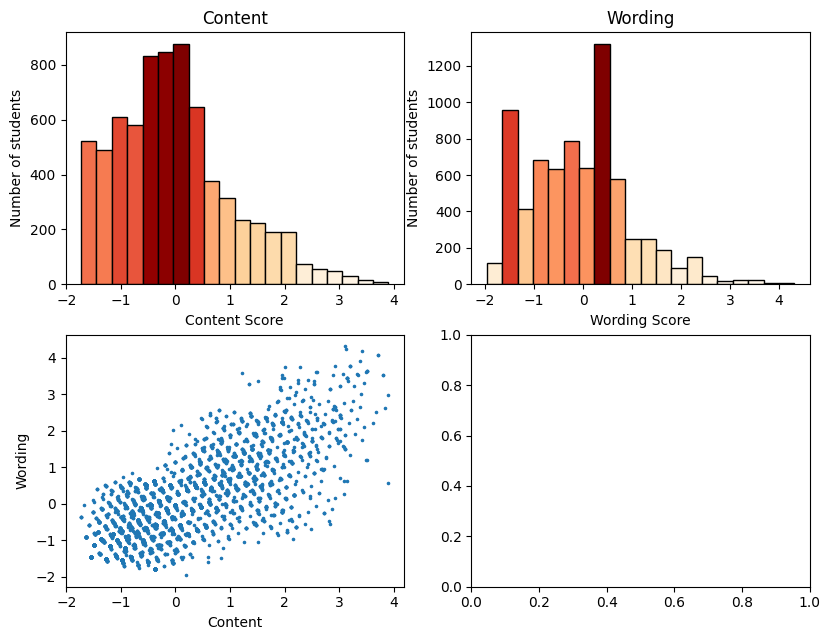

In [12]:
import matplotlib as mpl

# Grab data
content = df["content"].to_numpy()
wording = df["wording"].to_numpy()


#sns.histplot(data=df,x="content")
#sns.histplot(data=df,x="wording")

# Create subplots
fig, ax = plt.subplots(2,2)
print(fig.get_figwidth())
print(fig.get_figheight())
fig.set_figwidth(9.6)
fig.set_figheight(7.2)

# Subplot 1
ax[0][0].set_title("Content")
ax[0][0].set_xlabel("Content Score")
ax[0][0].set_ylabel("Number of students")

cm = mpl.colormaps['OrRd']
n, bins, patches = ax[0][0].hist(content,bins=20,edgecolor="black")

col = (n-n.min())/(n.max()-n.min())
for c, p in zip(col,patches):
  plt.setp(p,'facecolor',cm(c))

# Subplot 2
ax[0][1].set_title("Wording")
ax[0][1].set_xlabel("Wording Score")
ax[0][1].set_ylabel("Number of students")

n, bins, patches = ax[0][1].hist(wording,bins=20,edgecolor="black")

col = (n-n.min())/(n.max()-n.min())
for c, p in zip(col,patches):
  plt.setp(p,'facecolor',cm(c))

# Subplot 3
ax[1][0].set_xlabel("Content")
ax[1][0].set_ylabel("Wording")
ax[1][0].scatter(content,wording,marker=".",s=10)

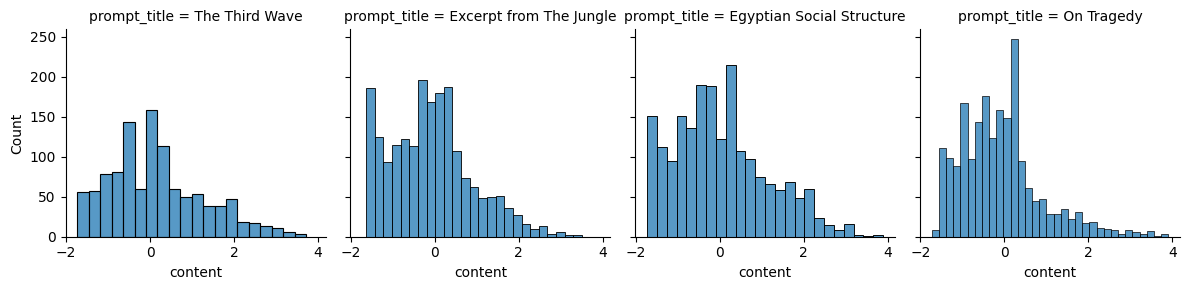

In [13]:
g = sns.FacetGrid(df,col="prompt_title")
g.map_dataframe(sns.histplot,x="content")

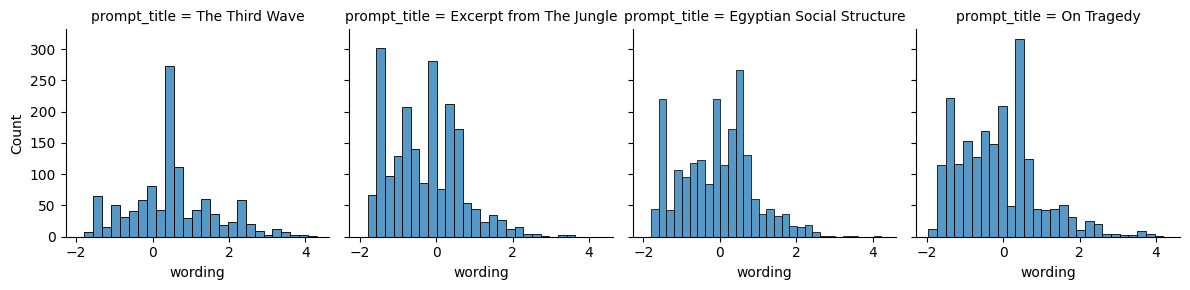

In [14]:
h = sns.FacetGrid(df,col="prompt_title")
h.map_dataframe(sns.histplot,x="wording")

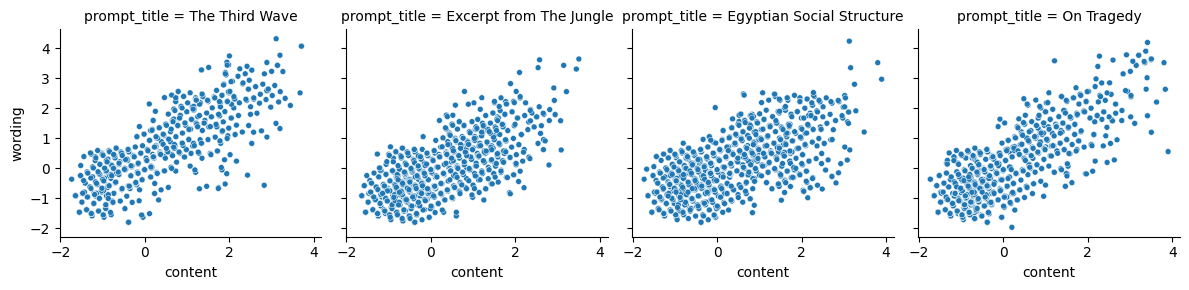

In [15]:
fg3 = sns.FacetGrid(df,col="prompt_title")
fg3.map_dataframe(sns.scatterplot,x="content",y="wording",size=0.25)

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [16]:
overrepresented_words = [list(filter(lambda x: x > 3, [df["text"][i].lower().split().count(st) for st in df["text"][i].lower().split()])) for i in range(len(df["text"]))]
underrepresented_words = [list(filter(lambda x: x < 3, [df["text"][i].lower().split().count(st) for st in df["text"][i].lower().split()])) for i in range(len(df["text"]))]




## **Section 5: Three Interesting Plots (Q6, 15 points)**

In [17]:
# TODO

## **Section 6: Baseline Model (Q7, 10 points)**

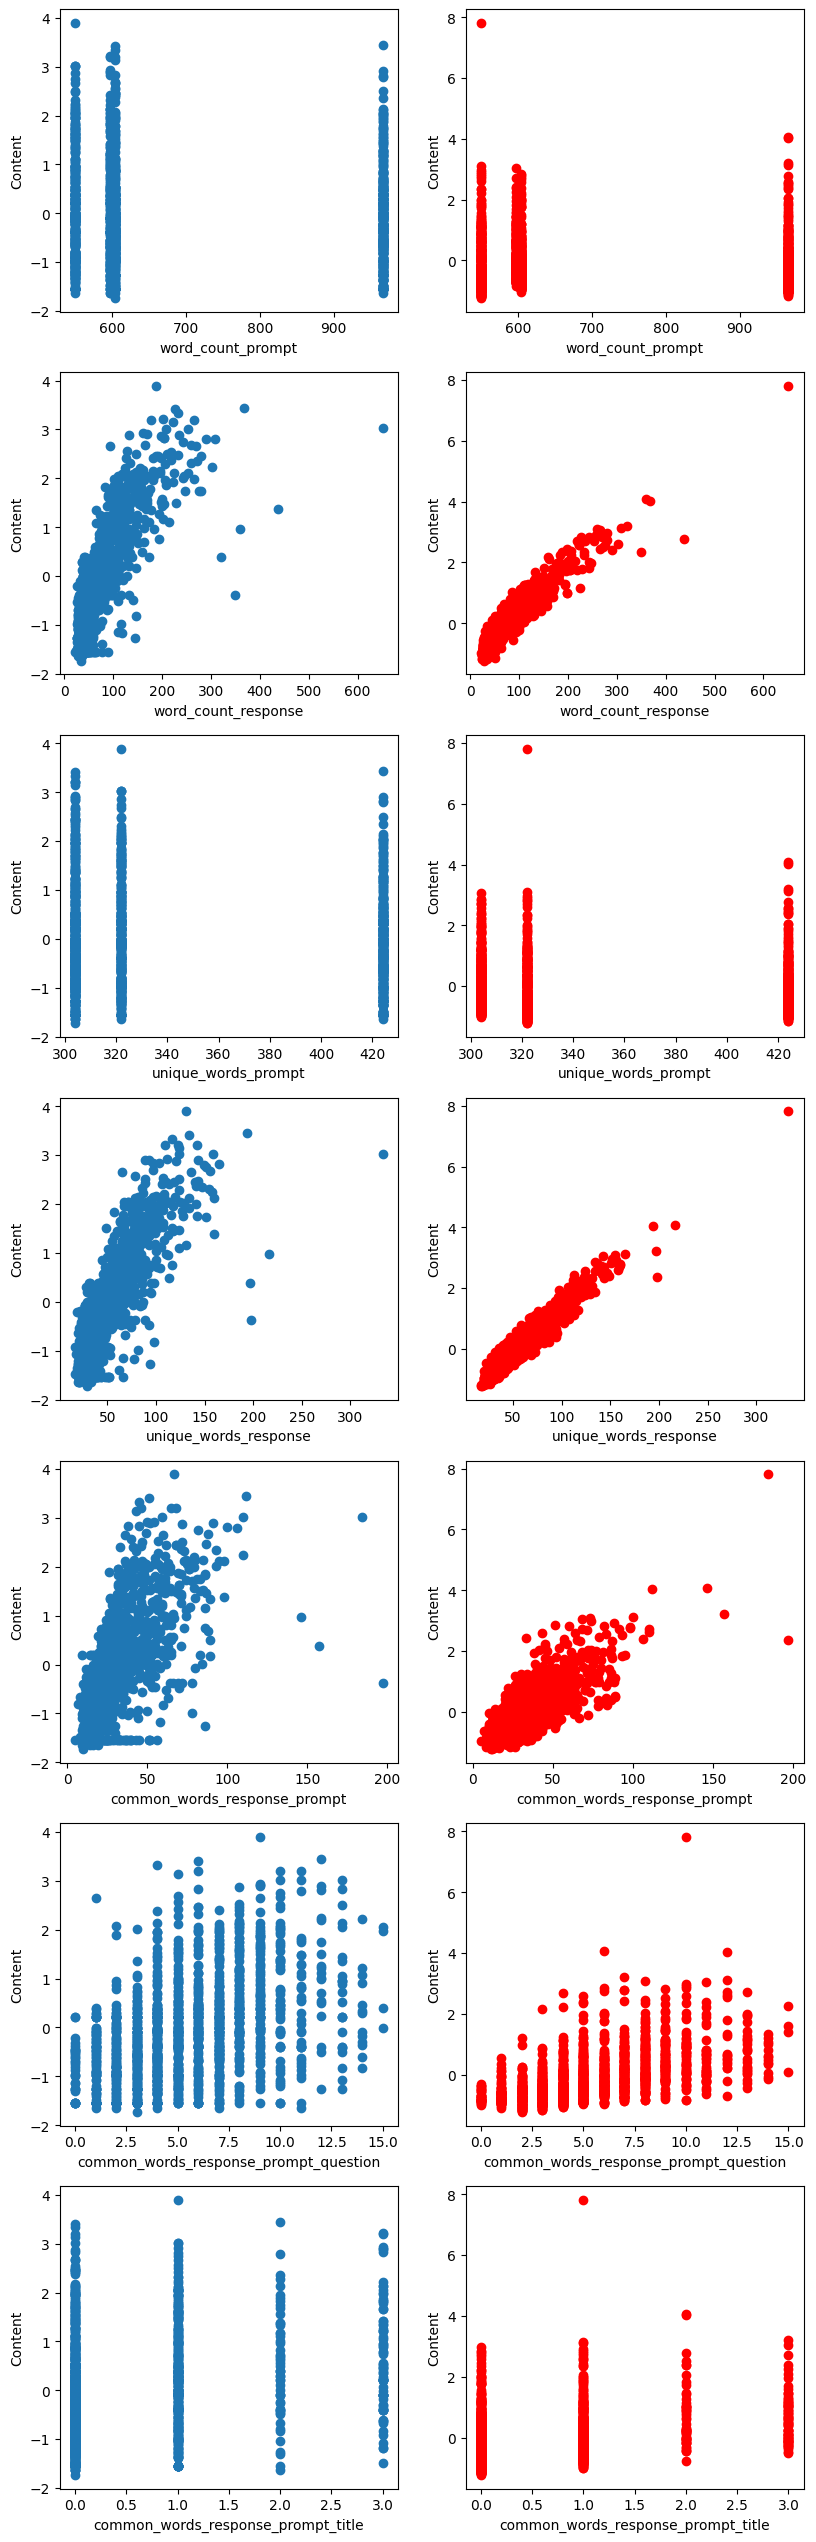

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Create the data frame for the data
regr_df = pd.DataFrame(data=df1,columns=feat_cols)
regr_data = regr_df.to_numpy()
# display(regr_df)

# Create the regression models
content_regr = linear_model.LinearRegression()
wording_regr = linear_model.LinearRegression()

# Test Train Split
content_x_train, content_x_test, content_y_train, content_y_test = train_test_split(regr_data,content,shuffle=True,train_size=0.8)
content_regr.fit(content_x_train,content_y_train)

content_y_pred = content_regr.predict(content_x_test)

n_columns = len(regr_df.columns)
figure, content_graphs = plt.subplots(n_columns,2)
figure.set_figwidth(9.6)
figure.set_figheight(32.2)
for i,item in enumerate(regr_df.columns):
  content_graphs[i][0].set_xlabel(item)
  content_graphs[i][1].set_xlabel(item)
  content_graphs[i][0].set_ylabel("Content")
  content_graphs[i][1].set_ylabel("Content")
  content_graphs[i][0].scatter(content_x_test[:,i],content_y_test)
  content_graphs[i][1].scatter(content_x_test[:,i],content_y_pred,c="red")

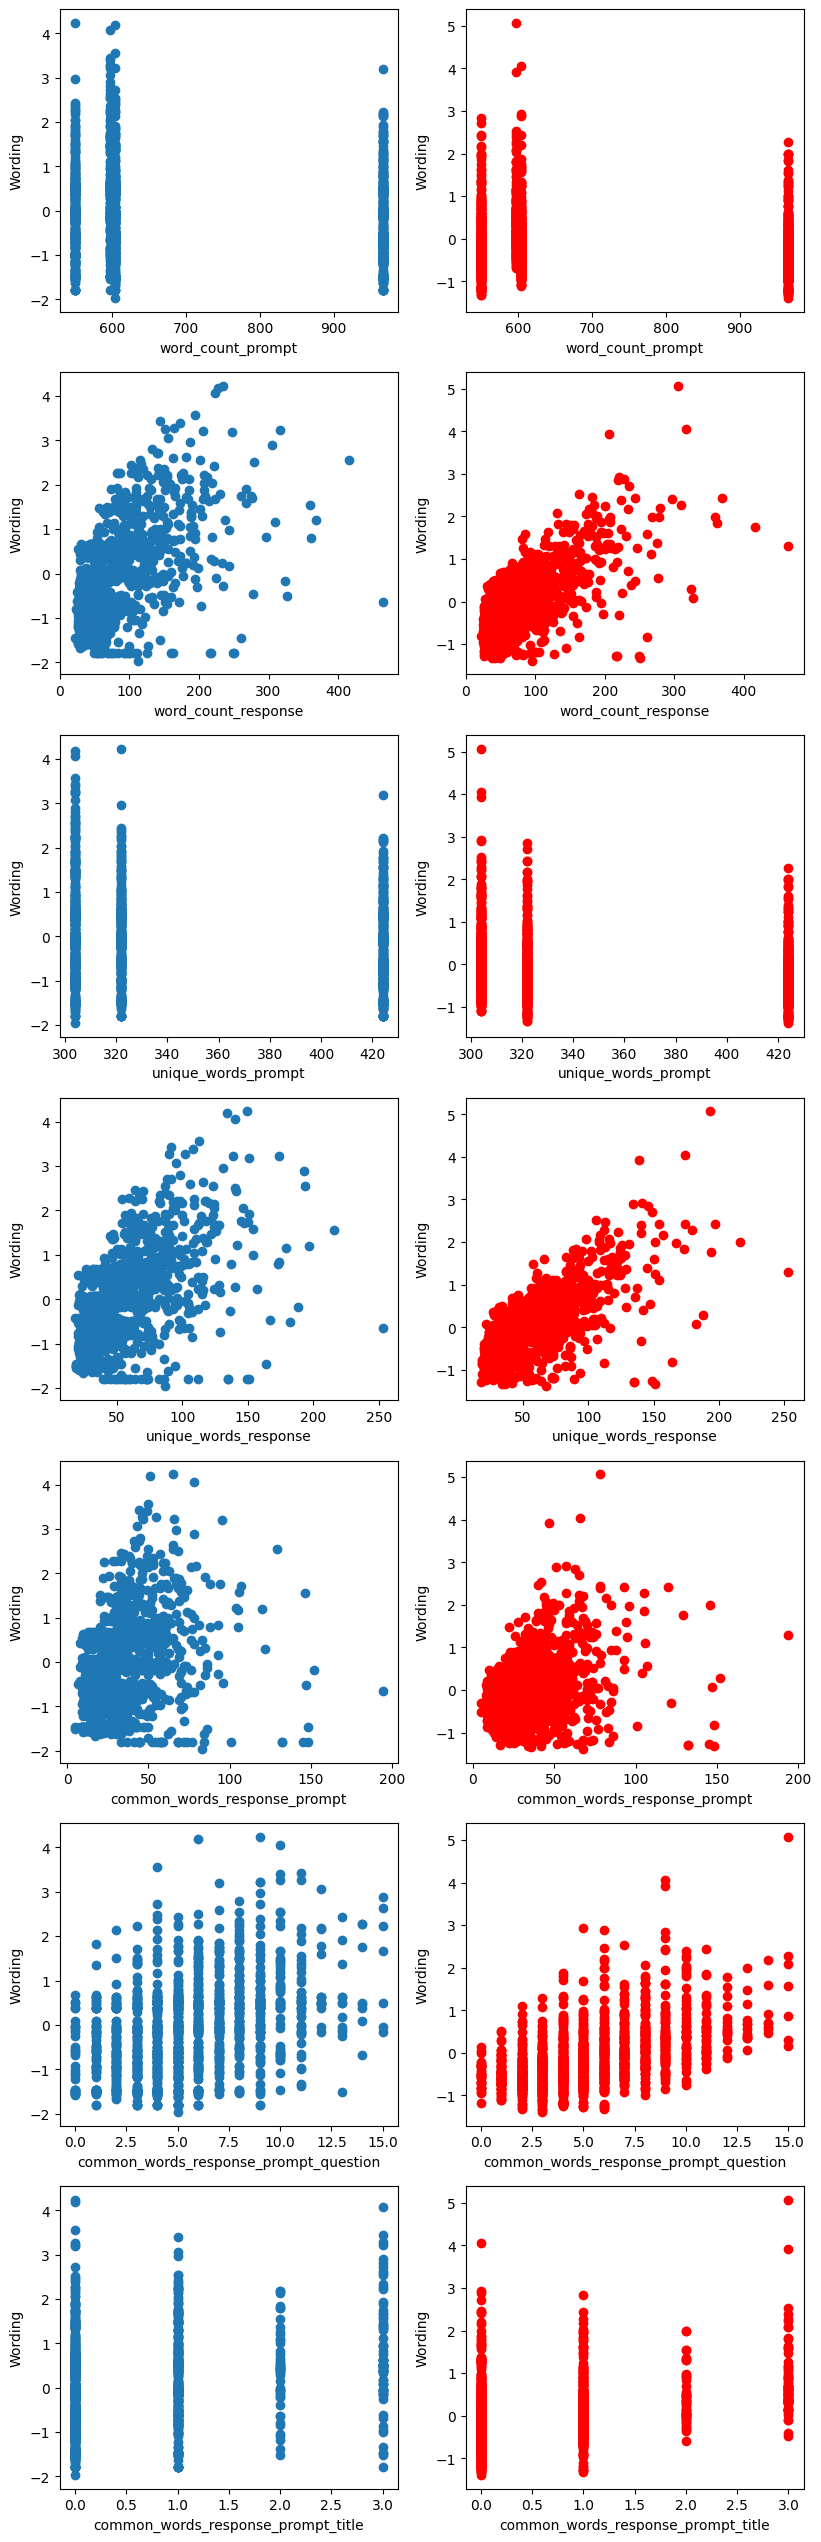

In [19]:
wording_x_train, wording_x_test, wording_y_train, wording_y_test = train_test_split(regr_data,wording,shuffle=True,train_size=0.8)
wording_regr.fit(wording_x_train,wording_y_train)

wording_y_pred = wording_regr.predict(wording_x_test)

n_columns = len(regr_df.columns)
fig2, wording_graphs = plt.subplots(n_columns,2)
fig2.set_figwidth(9.6)
fig2.set_figheight(32.2)
for i,item in enumerate(regr_df.columns):
  wording_graphs[i][0].set_xlabel(item)
  wording_graphs[i][1].set_xlabel(item)
  wording_graphs[i][0].set_ylabel("Wording")
  wording_graphs[i][1].set_ylabel("Wording")
  wording_graphs[i][0].scatter(wording_x_test[:,i],wording_y_test)
  wording_graphs[i][1].scatter(wording_x_test[:,i],wording_y_pred,c="red")

In [20]:
print("Content Regression Model - Mean Squared Error on Test (MSE): %.2f" % (mean_squared_error(content_y_test,content_y_pred)))
print("Wording Regression Model - Mean Squared Error on Test (MSE): %.2f" % (mean_squared_error(wording_y_test,wording_y_pred)))

Content Regression Model - Mean Squared Error on Test (MSE): 0.33
Wording Regression Model - Mean Squared Error on Test (MSE): 0.45


## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [21]:
# Model 1
model1_content_regr = linear_model.LinearRegression()
model1_wording_regr = linear_model.LinearRegression()

Wording Regression Model - Mean Squared Error on Test (MSE): 0.43


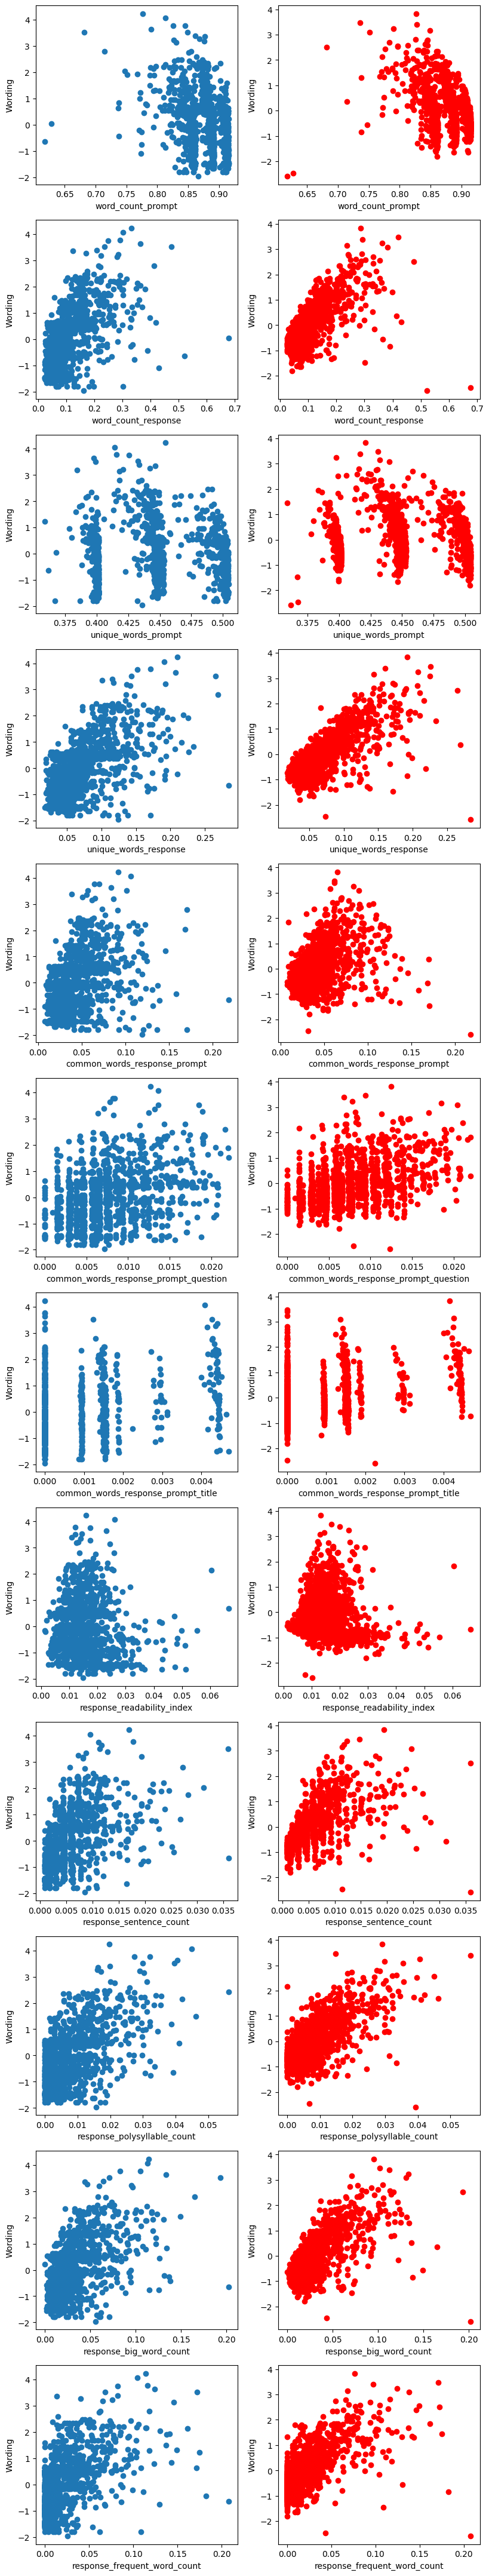

In [22]:
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, MaxAbsScaler
scaler = StandardScaler() # Recieved 0.38-0.40
normalizer = Normalizer() # Recieved 0.38
rb_scaler = RobustScaler() # Recieved MSE 0.39
ma_scaler = MaxAbsScaler() # Recieved MSE 0.37

regr_df2 = pd.DataFrame(data=regr_df)
regr_df2_combined = regr_df2.join(df2)
#regr_df2_combined.pop("response_sentence_count")
#regr_df2_combined.pop("response_polysyllable_count")
#regr_df2_combined.pop("response_big_word_count")
#regr_df2_combined.pop("response_frequent_word_count")
regr_data2 = regr_df2_combined.to_numpy()

# print(comb.columns)
#m1_c_regr_n = make_pipeline(Normalizer(),linear_model.LinearRegression())
#m1_c_regr_n.fit(content_x_train,content_y_train)
#m1_c_regr_predict = m1_c_regr_n.predict(content_y_test)

#print("Pipeline Test - MSE on Test %.2f" % (mean_squared_error(content_y_test,m1_c_regr_predict)))


vecs = []
#print(regr_data)
normalizer.fit(regr_data2)
vecs = normalizer.transform(regr_data2)

# wording_regr
#for i in range(len(regr_df.columns)):
#  col = regr_data2[:,i]
#  scaler.fit([col])
#  vec = scaler.transform([col])
#  vecs.append(vec)

#print(vecs)
# normalizeddata = np.hstack(tuple(vecs))
# print(normalizeddata)

wording_normalized_x_train, wording_normalized_x_test, wording_normalized_y_train, wording_normalized_y_test = train_test_split(vecs,wording,shuffle=True,train_size=0.8)
model1_wording_regr.fit(wording_normalized_x_train,wording_normalized_y_train)
wording_normalized_y_pred = model1_wording_regr.predict(wording_normalized_x_test)
print("Wording Regression Model - Mean Squared Error on Test (MSE): %.2f" % (mean_squared_error(wording_normalized_y_test,wording_normalized_y_pred)))

n_columns = len(regr_df2_combined.columns)
fig3, wording_normalized_graphs = plt.subplots(n_columns,2)
fig3.set_figwidth(9.6)
fig3.set_figheight(55.2)
for i,item in enumerate(regr_df2_combined.columns):
  wording_normalized_graphs[i][0].set_xlabel(item)
  wording_normalized_graphs[i][1].set_xlabel(item)
  wording_normalized_graphs[i][0].set_ylabel("Wording")
  wording_normalized_graphs[i][1].set_ylabel("Wording")
  wording_normalized_graphs[i][0].scatter(wording_normalized_x_test[:,i],wording_normalized_y_test)
  wording_normalized_graphs[i][1].scatter(wording_normalized_x_test[:,i],wording_normalized_y_pred,c="red")

Content Regression Model - Mean Squared Error on Test (MSE): 0.25


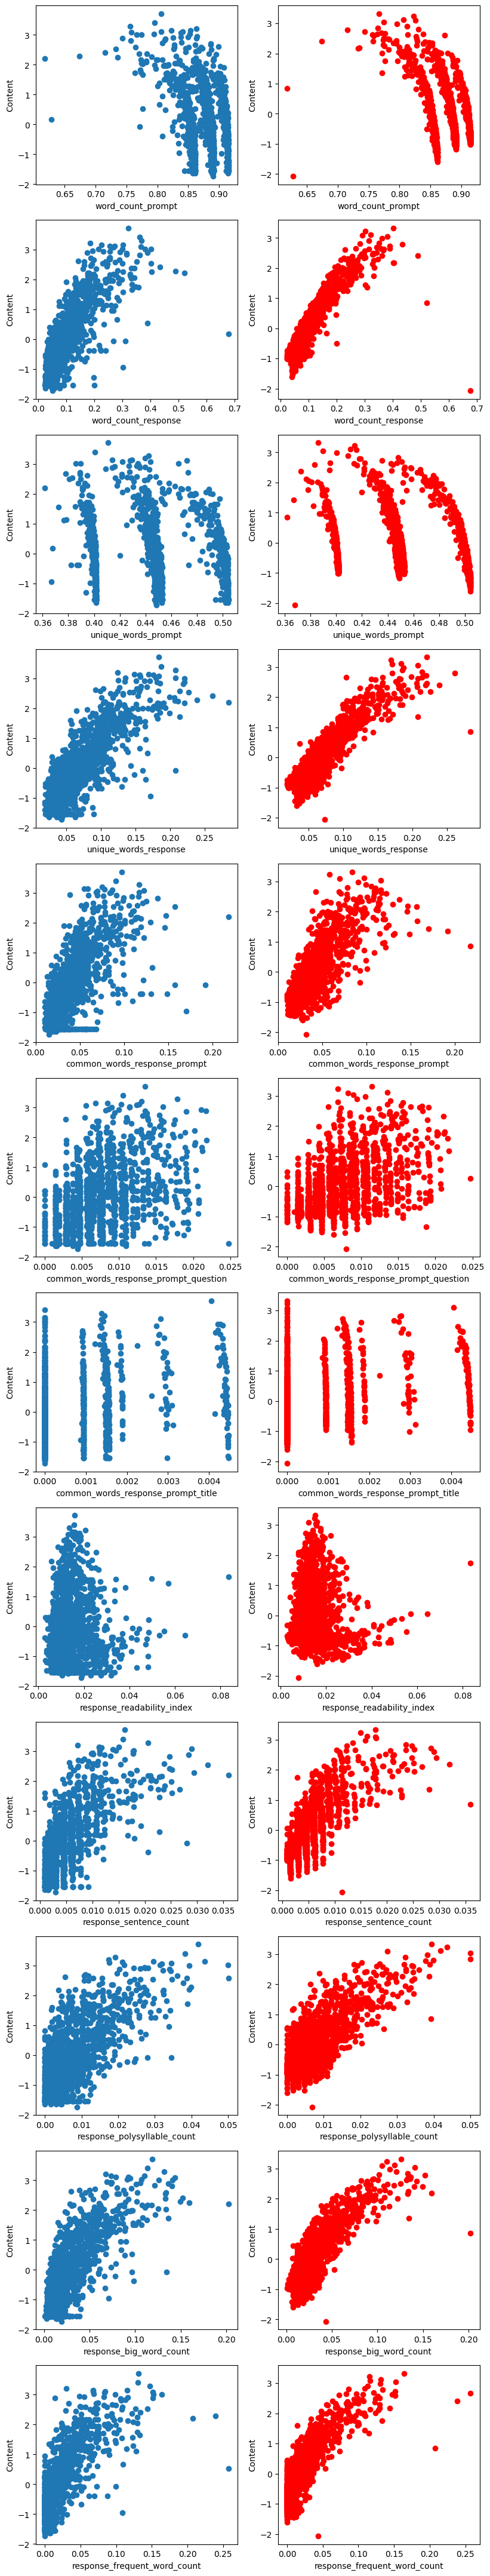

In [23]:
content_normalized_x_train, content_normalized_x_test, content_normalized_y_train, content_normalized_y_test = train_test_split(vecs,content,shuffle=True,train_size=0.8)
model1_content_regr.fit(content_normalized_x_train,content_normalized_y_train)
content_normalized_y_pred = model1_content_regr.predict(content_normalized_x_test)

print("Content Regression Model - Mean Squared Error on Test (MSE): %.2f" % (mean_squared_error(content_normalized_y_test,content_normalized_y_pred)))

n_columns = len(regr_df2_combined.columns)
fig4, content_normalized_graphs = plt.subplots(n_columns,2)
fig4.set_figwidth(9.6)
fig4.set_figheight(55.2)

for i,item in enumerate(regr_df2_combined.columns):
  content_normalized_graphs[i][0].set_xlabel(item)
  content_normalized_graphs[i][1].set_xlabel(item)
  content_normalized_graphs[i][0].set_ylabel("Content")
  content_normalized_graphs[i][1].set_ylabel("Content")
  content_normalized_graphs[i][0].scatter(content_normalized_x_test[:,i],content_normalized_y_test)
  content_normalized_graphs[i][1].scatter(content_normalized_x_test[:,i],content_normalized_y_pred,c="red")


In [46]:
from sklearn.neighbors import KNeighborsRegressor
# Model 2
model2_content_regr = KNeighborsRegressor(weights="distance")#linear_model.Ridge(alpha=0.1)
model2_wording_regr = KNeighborsRegressor(weights="distance")#linear_model.Ridge(alpha=0.03)

Wording Regression Model - Mean Squared Error on Test (MSE): 0.38


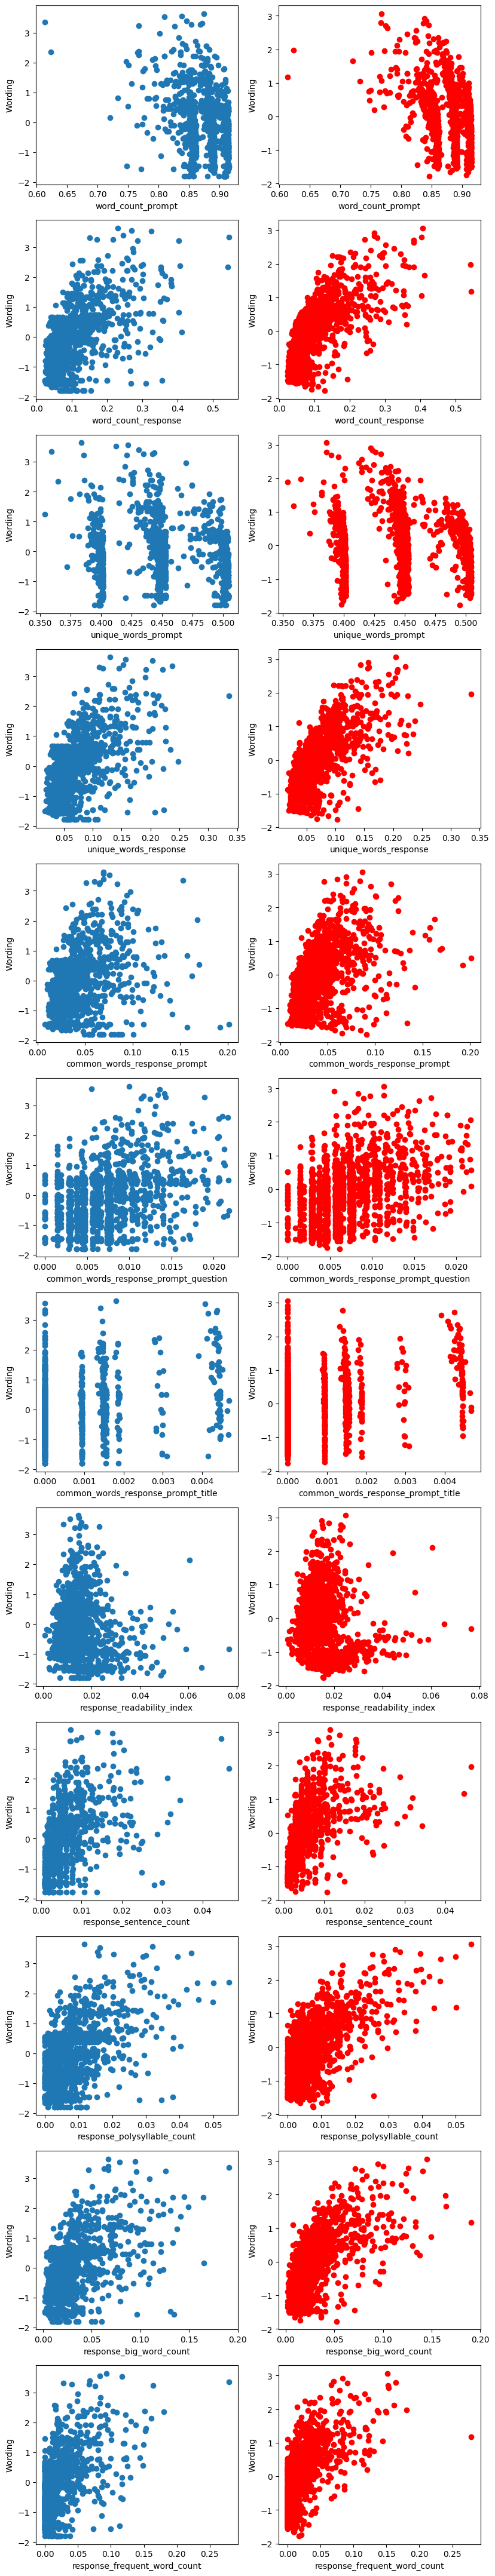

In [47]:
model2_wording_normalized_x_train, model2_wording_normalized_x_test, model2_wording_normalized_y_train, model2_wording_normalized_y_test = train_test_split(vecs,wording,shuffle=True,train_size=0.8)
model2_wording_regr.fit(model2_wording_normalized_x_train,model2_wording_normalized_y_train)
model2_wording_normalized_y_pred = model2_wording_regr.predict(model2_wording_normalized_x_test)
print("Wording Regression Model - Mean Squared Error on Test (MSE): %.2f" % (mean_squared_error(model2_wording_normalized_y_test,model2_wording_normalized_y_pred)))

n_columns = len(regr_df2_combined.columns)
fig5, model2_wording_normalized_graphs = plt.subplots(n_columns,2)
fig5.set_figwidth(9.6)
fig5.set_figheight(55.2)
for i,item in enumerate(regr_df2_combined.columns):
  model2_wording_normalized_graphs[i][0].set_xlabel(item)
  model2_wording_normalized_graphs[i][1].set_xlabel(item)
  model2_wording_normalized_graphs[i][0].set_ylabel("Wording")
  model2_wording_normalized_graphs[i][1].set_ylabel("Wording")
  model2_wording_normalized_graphs[i][0].scatter(model2_wording_normalized_x_test[:,i],model2_wording_normalized_y_test)
  model2_wording_normalized_graphs[i][1].scatter(model2_wording_normalized_x_test[:,i],model2_wording_normalized_y_pred,c="red")

Content Regression Model - Mean Squared Error on Test (MSE): 0.42


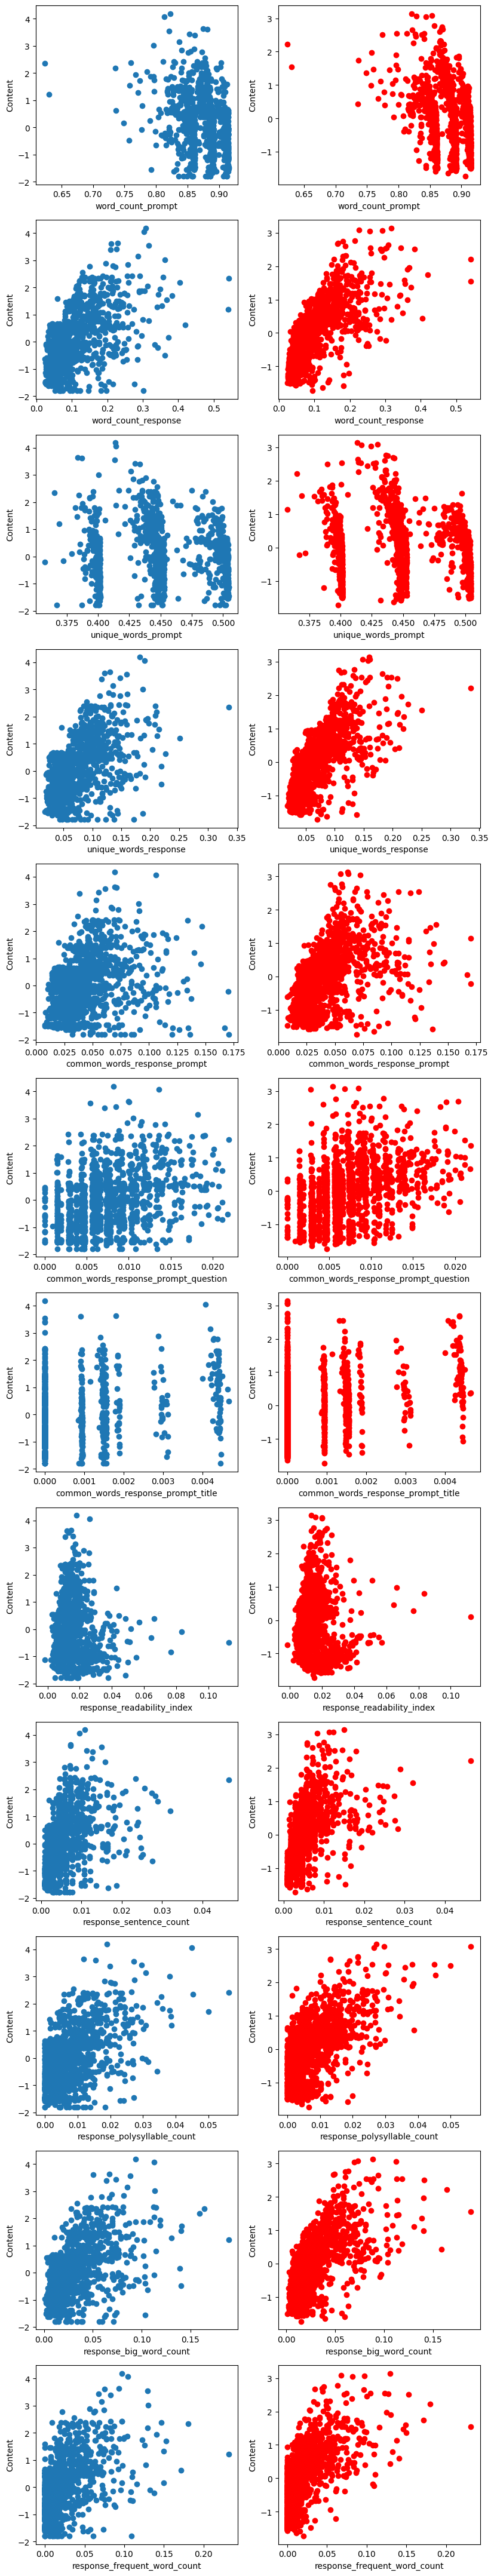

In [48]:
model2_content_normalized_x_train, model2_content_normalized_x_test, model2_content_normalized_y_train, model2_content_normalized_y_test = train_test_split(vecs,wording,shuffle=True,train_size=0.8)
model2_content_regr.fit(model2_content_normalized_x_train,model2_content_normalized_y_train)
model2_content_normalized_y_pred = model2_content_regr.predict(model2_content_normalized_x_test)
print("Content Regression Model - Mean Squared Error on Test (MSE): %.2f" % (mean_squared_error(model2_content_normalized_y_test,model2_content_normalized_y_pred)))

n_columns = len(regr_df2_combined.columns)
fig6, model2_content_normalized_graphs = plt.subplots(n_columns,2)
fig6.set_figwidth(9.6)
fig6.set_figheight(55.2)
for i,item in enumerate(regr_df2_combined.columns):
  model2_content_normalized_graphs[i][0].set_xlabel(item)
  model2_content_normalized_graphs[i][1].set_xlabel(item)
  model2_content_normalized_graphs[i][0].set_ylabel("Content")
  model2_content_normalized_graphs[i][1].set_ylabel("Content")
  model2_content_normalized_graphs[i][0].scatter(model2_content_normalized_x_test[:,i],model2_content_normalized_y_test)
  model2_content_normalized_graphs[i][1].scatter(model2_content_normalized_x_test[:,i],model2_content_normalized_y_pred,c="red")

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):